### cifar-10(CNN)

In [1]:
#CIFAR-10 데이터셋 : 10가지 컬러 이미지

# 비행기, 자동차, 새, 고양이, 사슴, 개, 개구리, 말, 배, 트럭
#6만장 (학습용 5만장, 검증용 1만장)
#32x32 이미지
#32x32x3 RGB 컬러 이미지

# http://www.cs.toronto.edu/~kriz/cifar.html

from tensorflow.keras import datasets, utils

def make_data():
    #다운로드 경로 : 사용자 계정 디렉토리 하위의 .keras 디렉토리
    (X_train, y_train),(X_test,y_test)=datasets.cifar10.load_data()

    #원 핫 인코딩 처리
    y_train=utils.to_categorical(y_train,10)
    y_test=utils.to_categorical(y_test,10)

    #데이터 정규화
    X_train=X_train.astype("float32")
    X_test=X_test.astype("float32")

    X_train /= 255
    X_test /= 255

    return (X_train,y_train), (X_test,y_test)

In [2]:
from keras import optimizers
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense,Activation,Flatten, Dropout

def make_model():
    model=Sequential()

    #padding="same" 출력크기를 입력크기와 같게 유지
    model.add(Conv2D(32,(3,3),padding="same",
#                   필터 32개, 3x3
                     input_shape=X_train.shape[1:],activation='relu'))
    model.add(Conv2D(32,(3,3),activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.25))
    model.add(Conv2D(64,(3,3),padding="same",activation='relu'))
    model.add(Conv2D(64,(3,3),activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.25))
    model.add(Flatten())
    model.add(Dense(512,activation='relu'))
    model.add(Dense(10,activation='softmax'))

    #학습률 0.0001, decay 학습속도를 감소시키는 옵션
    opt=optimizers.RMSprop(learning_rate=0.0001,decay=1e-6)

    model.compile(loss="categorical_crossentropy",
                 optimizer=opt,metrics=["accuracy"])

    return model

In [3]:
a=isinstance(1, int) # True
b=isinstance(1.2, float) # True

In [4]:
def plot_loss(history, title=None):
    #history가 dict 타입이 아니면
    if not isinstance(history, dict):
        history=history.history

    plt.plot(history["loss"])
    plt.plot(history["val_loss"])

    #타이틀이 설정되어 있지 않으면
    if title is not None:
        plt.title(title)

    plt.ylabel("loss")
    plt.xlabel("epoch")
    plt.legend(["Train","Test"],loc=0)

In [5]:
def plot_acc(history, title=None):
    if not isinstance(history, dict):
        history=history.history

    plt.plot(history["accuracy"])
    plt.plot(history["val_accuracy"])

    if title is not None:
        plt.title(title)

    plt.ylabel("accuracy")
    plt.xlabel("epoch")
    plt.legend(["Train","Test"],loc=0)

In [6]:
(X_train,y_train),(X_test,y_test)=make_data()

In [7]:
X_train.shape
# (샘플수, W, H, C(흑백 : 1 / 컬러 : 3))

(50000, 32, 32, 3)

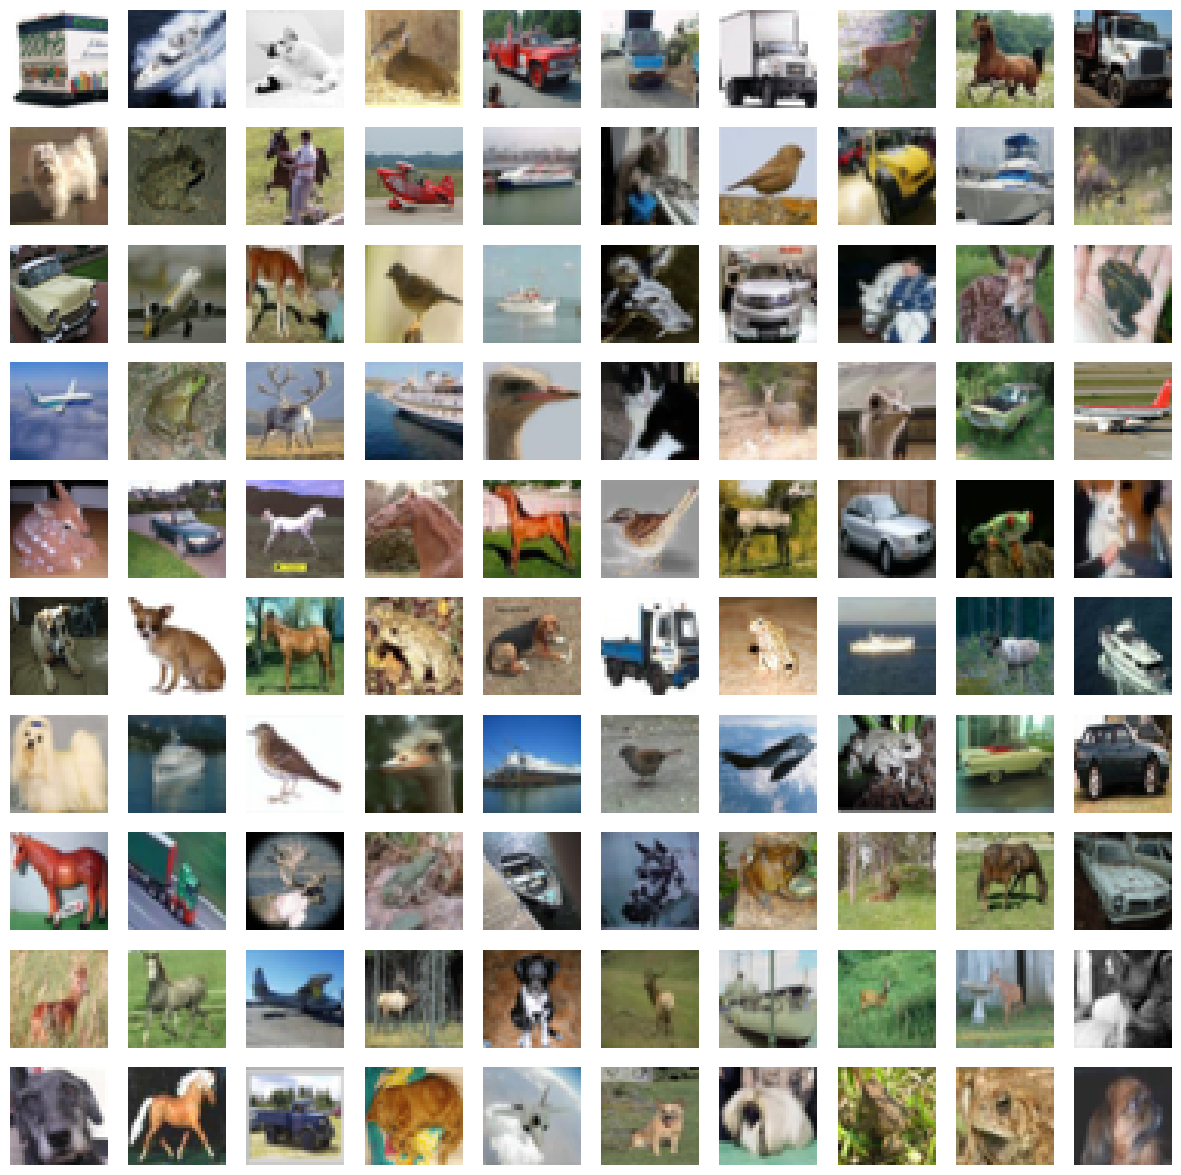

In [8]:
import numpy as np
import matplotlib.pyplot as plt

fig, axes1=plt.subplots(10,10,figsize=(15,15))

for j in range(10):
    for k in range(10):
        i = np.random.choice(range(len(X_train)))

        axes1[j][k].set_axis_off()
        axes1[j][k].imshow(X_train[i:i+1][0])

In [9]:
#모델 생성

model=make_model()

In [10]:
#학습 시간이 오래 걸림

import tensorflow as tf
with tf.device('/GPU:0'):
    history=model.fit(X_train,y_train,epochs=3,batch_size=32,validation_split=0.2)

Epoch 1/3
1250/1250 [==============================] - 22s 13ms/step - loss: 1.8183 - accuracy: 0.3381 - val_loss: 1.5978 - val_accuracy: 0.4292
Epoch 2/3
1250/1250 [==============================] - 16s 13ms/step - loss: 1.4967 - accuracy: 0.4586 - val_loss: 1.4088 - val_accuracy: 0.4956
Epoch 3/3
1250/1250 [==============================] - 16s 13ms/step - loss: 1.3654 - accuracy: 0.5109 - val_loss: 1.3009 - val_accuracy: 0.5379


In [11]:
#성능 평가

performance_test=model.evaluate(X_test,y_test,batch_size=128)

print(performance_test)

79/79 [==============================] - 1s 8ms/step - loss: 1.2873 - accuracy: 0.5423
[1.2872916460037231, 0.5422999858856201]


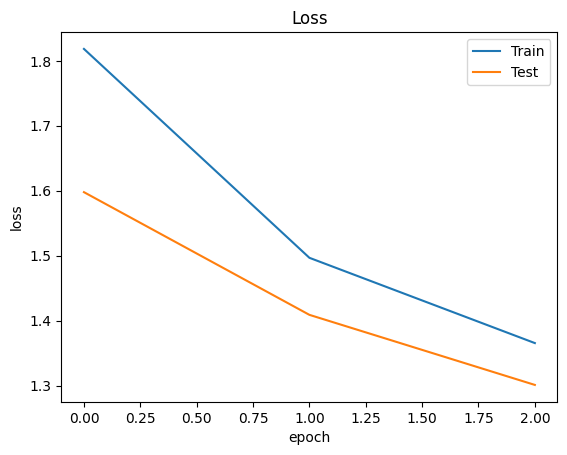

In [12]:
import matplotlib

plot_loss(history,"Loss")

plt.show()

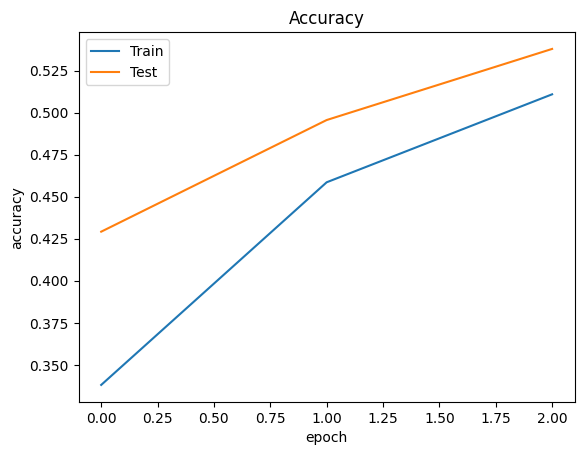

In [13]:
plot_acc(history, 'Accuracy')

plt.show()

In [14]:
from sklearn.metrics import confusion_matrix

y_pred=model.predict(X_test,verbose=1)
y_pred=np.argmax(y_pred, axis=1)

confusion_matrix(np.argmax(y_test,axis=1),y_pred)

313/313 [==============================] - 1s 3ms/step


array([[638,  45,  36,  15,  28,   6,  22,   5, 172,  33],
       [ 46, 740,   8,   7,   7,   2,  17,  10,  71,  92],
       [104,  25, 281,  83, 235,  57, 119,  37,  40,  19],
       [ 37,  37,  58, 367, 117, 104, 162,  60,  30,  28],
       [ 55,  13,  57,  61, 552,  21, 141,  67,  27,   6],
       [ 23,  13,  69, 213, 134, 349,  85,  80,  23,  11],
       [ 15,  24,  29,  49,  92,   8, 728,  22,  16,  17],
       [ 30,  10,  25,  57, 144,  66,  48, 569,  20,  31],
       [135,  79,  13,  11,   5,   5,   8,  12, 700,  32],
       [ 58, 236,   7,  12,  14,   8,  43,  30,  93, 499]], dtype=int64)

In [15]:
model.save('c:/data/cifar/cifar.h5')